# 梯度下降法

关于梯度下降法：

* 不是一个机器学习的算法
* 是一种基于搜索的最优化方法
* 作用：最小化一个损失函数
* 梯度上升法：最大化一个效用函数

> 总的来说，在机器学习领域，熟练的掌握梯度法来求一个函数的目标值，是很重要的。

![](img/isea36.jpg)

对于上图的解释，这里暂时只是讨论一阶导数的情况:

* 每取一个参数theta值，都有与之对应的一个损失函数J

在直线方程中，导数就代表着斜率，在曲线方程中，导数代表切线斜率，可以理解为theta单位变化时，J相应的变化；

导数可以代表一个方向，导数对应的方向就是损失函数J增大的方向，图中的例子中，导数是负值，也就是说J增大的方向，是X轴的负方向。 这里我们希望找到J的最小值，也就说theta沿着J减小的方向移动。所以应该向着导数的负方向移动，初此之外，还需要添加一个步长，所以是：$-\eta\frac{dJ}{d\theta}$

对于一个点来说，我们求出其导数，我们就求出了这个点对应的J增大的方向，但是我们要向J减小的方向继续前进，乘以负步长就OK，如果当前点+负步长*导数，该点就在向右移动，直到导数为0，J就达到了极小值。可以看到图中蓝色的点在图中是逐渐的下降的，因此叫做梯度下降法。为什么叫做梯度呢？

在上述的例子中，我们使用的是一维的函数，所以直接使用导数就行了，但是在多维函数中，我们需要对各个分量分别求导，那么最终得到的那个方向其实就是梯度。(准确的说是，我们对各个方向求方向导数得到那个最大的方向导数（等效于求对各个分量求偏导），就是梯度）
 
![](img/isea37.jpg)
 
梯度的方向，对应损失函数J增大的方向，而且是增大最快的方向。
 
并不是所有的函数都有唯一的极值点（比如说有一条曲线的有两个极小值点）：
   解决方案：
     * 多次运行，随机化初始点
     * 梯度下降法的初始点也是一个超参数
    
 在本次演示，线性回归中使用梯度下降法中：
 ![](img/isea38.jpg)
 
 ## 梯度下降法模拟

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 在 -1到6的范围之间取141个点,来表示θ的值
plot_x = np.linspace(-1,6,141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [4]:
# 设计二次曲线，来表示损失函数J,我们希望使用梯度下降法找到下面的这个曲线的最小值
plot_y = (plot_x - 2.5) ** 2 - 1

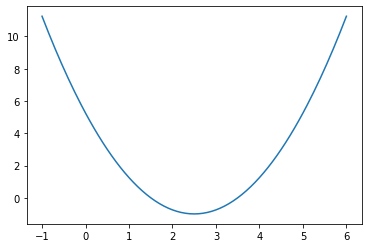

In [5]:
# 绘制图像
plt.plot(plot_x,plot_y)
plt.show()

In [26]:
# 计算损失函数J的导数
def dJ(theta):
    return 2 * (theta - 2.5)

# 求损失函数J的值
def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf')

In [27]:
# 设置梯度下降的起始点：
theta = 0.0

# 定义学习率
eta = 0.1

# 设置退出循环的精度
epsilon = 1e-8

# 迭代
while True:
    
    # 获取导函数的值
    gradient = dJ(theta)
    
    # 保存上一次的theta
    last_theta = theta
    
    # 获取新的theta
    theta = theta - eta * gradient
    
    # 判断J是否达到了最小值，也即导数是否为0（或者到达设置的精度），
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

# 打印J取到最小值的时候theta 的值     
print(theta)

# 打印取到的最小的损失函数的值
print(J(theta))

2.499891109642585
-0.99999998814289


### 观察theta的变化

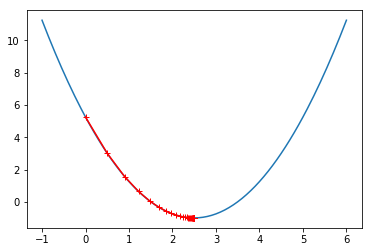

In [28]:
# 设置梯度下降的起始点：
theta = 0.0

# 定义学习率
eta = 0.1

# 设置退出循环的精度
epsilon = 1e-8

# 记录theta的历史变化
theta_history = [theta]

# 迭代
while True:
    gradient = dJ(theta)
    
    # 保存上一次的theta
    last_theta = theta
    
    # 获取新的theta
    theta = theta - eta * gradient
    
    # 将新的计算出来的theta值放入到数组中
    theta_history.append(theta)
    
    # 判断J是否达到了最小值，也即导数是否为0（或者到达设置的精度），
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

# 绘制theta和损失函数的图像
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+')
plt.show()

In [29]:
# 查看迭代的次数,经过了45次查找，还有一次是初始值
len(theta_history)

46

观察上面的绘图：可以发现刚开始变化的幅度比较大，因为在刚开始的时候，梯度本身比较陡（值较大），越是到后面，梯度在变得平缓，每一次变化也就少，直到最后损失函数的差值小于我们设定的值

### 将我们上述的代码进行封装

In [39]:
# 封装梯度下降法,n_iters = 1e4, 限制迭代的次数为10 000次
def gradient_descent(initial_theta,eta,n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iters = 0
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iters += 1

 # 封装绘制图像的函数
def plot_theta_history():
    plt.plot(plot_x,plot_y)
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+')
    plt.show()
            

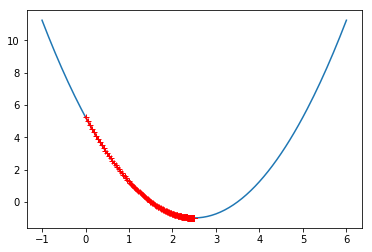

In [36]:
# 对于新的学习率，绘制新的图像
eta = 0.01 # 对于大多数函数，一它eta步长等于0.01 都是合理的。
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

In [37]:
len(theta_history)

424

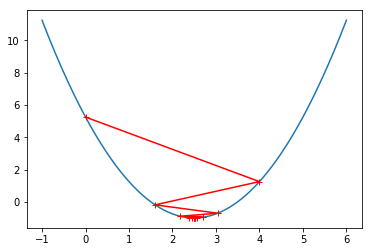

In [38]:
# 如果我们取值的时候，取了较大的学习率
eta = 0.8
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

In [34]:
len(theta_history)

22

在上面的例子中，我们在使用二次曲线作为损失函数，从而来模拟梯度下降法的过程。接下来，将梯度下降法应用在多元线性回归中

## 线性回归中的梯度下降法
![](img/isea39.jpg)

* 如果有一个特征值，那么我们处理的导数是一个数字，如果有多个特征值，那么我们处理的导数（梯度）是一个向量。
* 梯度代表的方向，代表着J增大的方向。

**如图是有两个特征（也即3个参数）的梯度下降法的一个可视化**
![](img/isea40.jpg)

* 图中一圈一圈的是等高线，也即为z的取值，越外面的圈，取值越大，越内的圈取值越小，在中心的位置达到z的最小值。x，y对应着参数。
* 在某点出，我们有多个方向的选择，但是梯度的方向是下降最快的（实际是梯度的反向）

## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# 为了增加可重复性，这里添加随机种子
np.random.seed(666)

# 这里设置100个样本，每一个样本只有一个特征
x = 2 * np.random.random(size = 100)
# y值
y = x * 3. + 4.+ np.random.random(size = 100)

In [39]:
x.shape

(100,)

In [40]:
X = x.reshape(-1,1)
X.shape

(100, 1)

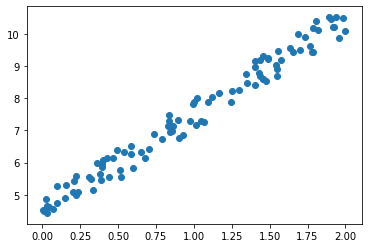

In [41]:
plt.scatter(x,y)
plt.show()

## 使用梯度下降法训练线性回归的模型，从而来拟合样本
![](img/isea56.jpg)

In [42]:
def J(theta,X_b,y): 
    try:
        # （真值 - 预测值）平方求和，之后再除以样本的数量（也即样本有多少行）
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [43]:
# 我们的方法针对的X是一个矩阵
def dJ(theta,X_b,y):
    # 在这里开辟一个空间，因为这里是大J对theta的每个维度求偏导，所以：
    res = np.empty(len(theta)) # θ中有多少个元素，res中就应该有多少个元素
    # 第一个偏导
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range (1, len(theta)): # 从1 一直到theta的最后一项
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i]) # 每一个样本都取出第i角标个特征对应的向量
    return res * 2 / len(X_b)

In [44]:
# 封装梯度下降方法
# 封装梯度下降法,n_iters = 1e4, 限制迭代的次数为10 000次
def gradient_descent(X_b,y,initial_theta,eta,n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iters = 0
    
    while i_iters < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta  - eta * gradient

        
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        i_iters += 1
    return theta

In [45]:
# 为原先的X添加一列,有样本个数那么多行，但是只有一列
X_b = np.hstack([np.ones((len(X),1)),X])
# 此时的theta是一个向量，该项量的个数是特征数 + 1，也是X_b这个矩阵的列数
initial_theta = np.zeros(X_b.shape[1]) 

# 设置初始的eta值
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta )

In [46]:
theta

array([4.54503299, 2.96828885])

## 梯度下降法的向量化运算
上面我们使用的是for循环的方式计算梯度，这里我们将使用向量化的方式来计算梯度
![](img/gradient/g1.png)

![](img/isea57.jpg)

当我们使用梯度下降法搜索损失函数的最小值的时候，对数据需要进行归一化处理

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# 更改上述的梯度下降的代码如下：
def J(theta,X_b,y): 
    try:
        # （真值 - 预测值）平方求和，之后再除以样本的数量（也即样本有多少行）
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    
# 我们的方法针对的X是一个矩阵
def dJ(theta,X_b,y):
    
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y) # 除以样本总数，len(X_b)亦可

# 封装梯度下降方法
# 封装梯度下降法,n_iters = 1e4, 限制迭代的次数为10 000次
def gradient_descent_new(X_b,y,initial_theta,eta,n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iters = 0
    
    while i_iters < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta  - eta * gradient

        
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        i_iters += 1
    return theta


In [53]:
initial_theta = np.zeros(X_b.shape[1]) 

# 设置初始的eta值
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta )
theta

array([4.54503299, 2.96828885])

使用上述的方式，我们就生成了一个相对复杂的虚拟数据，我们使用正规方程解，在使用梯度下降法解，两者的耗时是不一样的。